In [ ]:
라이브러리 임포트

In [2]:
import numpy as np
import matplotlib.pyplot as pylab
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from skimage.io import imread
from sklearn.utils import shuffle
from skimage import img_as_float

In [ ]:
PCA를 활용한 차원 감소와 시각화

(1797, 64)


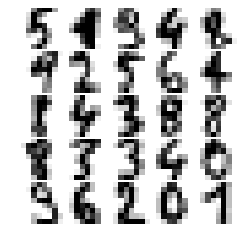

In [6]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape) # (1797, 64)

j = 1
np.random.seed(1)
fig = pylab.figure(figsize=(3,3))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in np.random.choice(digits.data.shape[0], 25):
    pylab.subplot(5,5, j), pylab.axis('off')
    pylab.imshow(np.reshape(digits.data[i,:], (8,8)), cmap='binary')
    j += 1
    
pylab.show()

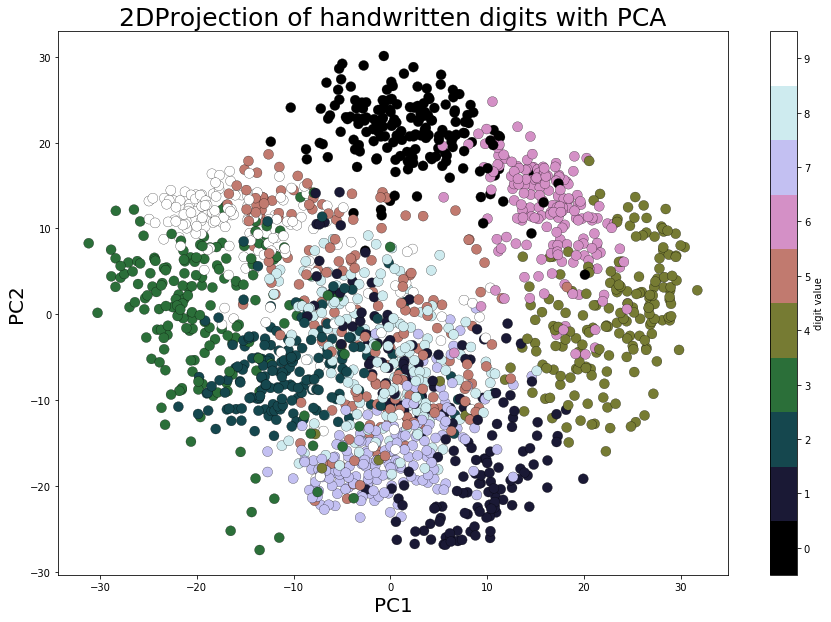

In [7]:
from sklearn.decomposition import PCA

pca_digits = PCA(2)
digits.data_proj = pca_digits.fit_transform(digits.data)
pylab.figure(num='', figsize=(15,10))
pylab.scatter(digits.data_proj[:, 0], digits.data_proj[:, 1], lw=0.25, \
              c=digits.target, edgecolor='k', s=100,\
              cmap=pylab.cm.get_cmap('cubehelix',10))

pylab.xlabel('PC1', size=20), pylab.ylabel('PC2', size=20)
pylab.title('2DProjection of handwritten digits with PCA', size=25)
pylab.colorbar(ticks=range(10), label='digit value')
pylab.clim(-0.5, 9.5)
pylab.show()

(400, 4096)


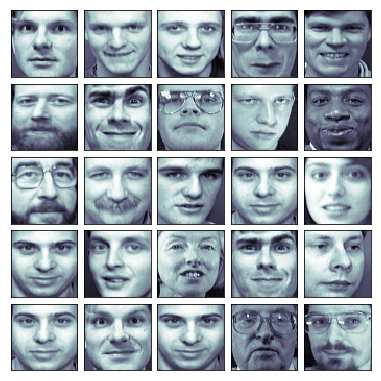

In [8]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces().data
print(faces.shape) # (400, 4096) → (64×64=4,096) 화소의 400개의 얼굴 영상
fig = pylab.figure(figsize=(5,5))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.1, wspace=0.1)

# 25개 랜덤 얼굴 영상 표시
j=1
np.random.seed(0)
for i in np.random.choice(range(faces.shape[0]), 25):
    ax = fig.add_subplot(5, 5, j, xticks=[], yticks=[])
    face = np.reshape(faces[i,:],(64,64))
    ax.imshow(face, cmap='bone', interpolation='nearest')
    j += 1
pylab.show()

In [ ]:
지배적인 64개 주성분

(400, 64)


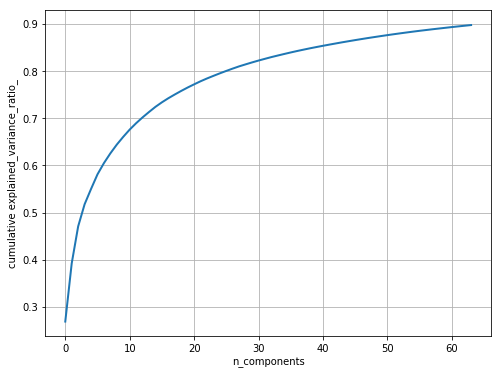

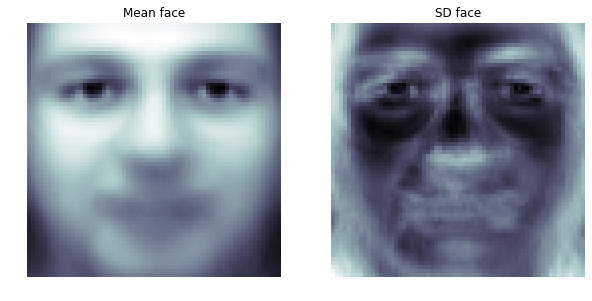

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

n_comp = 64
pipeline = Pipeline([('scaling', StandardScaler()), \
                     ('pca', PCA(n_comp))])
faces_proj = pipeline.fit_transform(faces)
print(faces_proj.shape) # (400, 64)
mean_face = np.reshape(pipeline.named_steps['scaling'].mean_, (64,64))
sd_face = np.reshape(np.sqrt(pipeline.named_steps['scaling'].var_), (64,64))

pylab.figure(figsize=(8, 6))
variance_ratio = pipeline.named_steps['pca'].explained_variance_ratio_
pylab.plot(np.cumsum(variance_ratio), linewidth=2)
pylab.grid(), pylab.axis('tight'), pylab.xlabel('n_components')
pylab.ylabel('cumulative explained_variance_ratio_')
pylab.show()

pylab.figure(figsize=(10,5))
pylab.subplot(121), pylab.imshow(mean_face, cmap='bone')
pylab.axis('off'), pylab.title('Mean face')
pylab.subplot(122), pylab.imshow(sd_face, cmap='bone')
pylab.axis('off'), pylab.title('SD face')
pylab.show()

In [ ]:
고유 얼굴

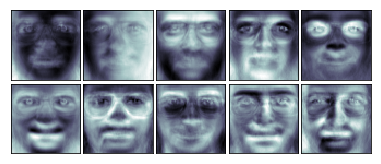

In [10]:
fig = pylab.figure(figsize=(5,2))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# 첫 10개 고유얼굴 표시
for i in range(10):
    face = np.reshape(pipeline.named_steps['pca'].components_[i, :], (64, 64))
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.imshow(face, cmap='bone', interpolation='nearest')
pylab.show()

In [ ]:
재구성

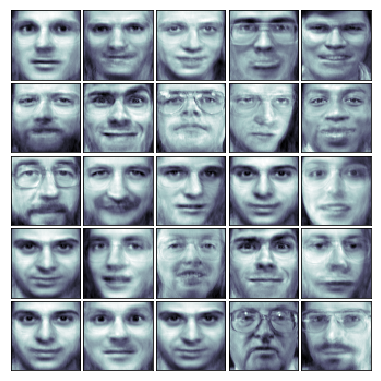

In [14]:
# 얼굴 재구성 - 64×64 크기
faces_inv_proj = pipeline.named_steps['pca'].inverse_transform(faces_proj)
faces_inv_proj = np.reshape(faces_inv_proj, (400, 64, 64))

# 64×64 차원의 영상 400개 형태 변환
fig = pylab.figure(figsize=(5,5))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# 64×64(8×8 아님)차원의 각 얼굴 그리기
j = 1
np.random.seed(0) # 매번 같은 임의값 지정 위해
for i in np.random.choice(range(faces.shape[0]), 25):
    reconst_face = mean_face + sd_face * faces_inv_proj[i, :]
    ax = fig.add_subplot(5, 5, j, xticks=[], yticks=[])
    ax.imshow(reconst_face, cmap='bone', interpolation='nearest')
    j += 1
pylab.show()

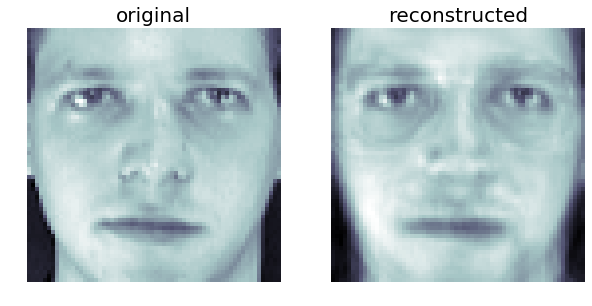

In [19]:
orig_face = np.reshape(faces[0,:], (64,64))
reconst_face = faces_proj[0]@pipeline.named_steps['pca'].components_
reconst_face = mean_face + sd_face * np.reshape(reconst_face, (64,64))



pylab.figure(figsize=(10,5))
pylab.subplot(121), pylab.axis('off'), pylab.title('original', size=20)
pylab.imshow(orig_face, cmap='bone', interpolation='nearest')
pylab.subplot(122), pylab.axis('off'), pylab.title('reconstructed', size=20)
pylab.imshow(reconst_face, cmap='bone', interpolation='nearest'),
pylab.show()